# Linear Regression

## Data Visualization

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf 
import statsmodels.api as sm 
import lmdiag
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
data_credit = pd.read_csv("C:\\Users\\apoghosyan\\Desktop\\YSU_ML\\ISLR_Data\\Credit.csv")
print(data_credit.shape)
print(data_credit.columns)
data_credit = data_credit.drop(['Unnamed: 0'], axis = 1)
data_credit.head(5)

(400, 12)
Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [132]:
data_credit.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

In [105]:
data_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [106]:
data_credit.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [107]:
data_credit.Student.describe()

count     400
unique      2
top        No
freq      360
Name: Student, dtype: object

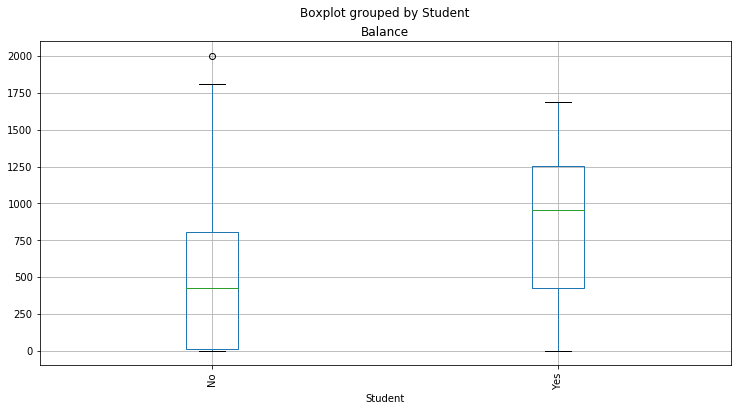

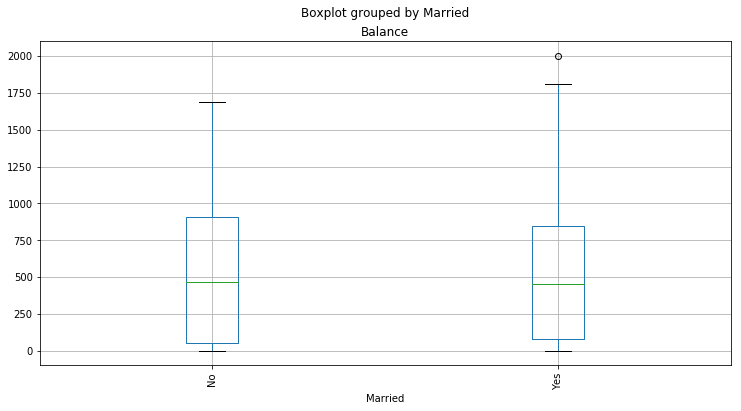

In [123]:
data_credit.boxplot('Balance','Student', rot = 90, figsize=(12,6));
data_credit.boxplot('Balance','Married', rot = 90, figsize=(12,6));

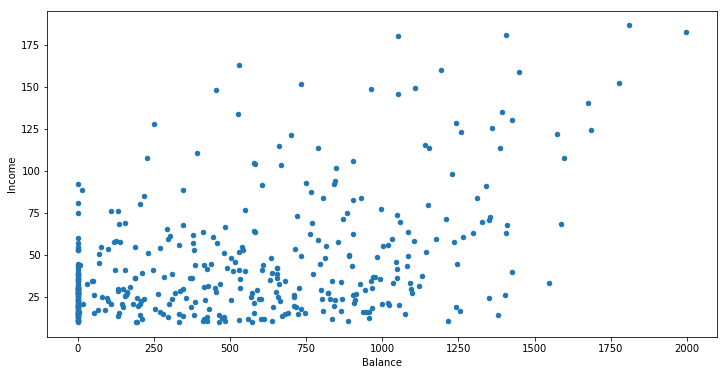

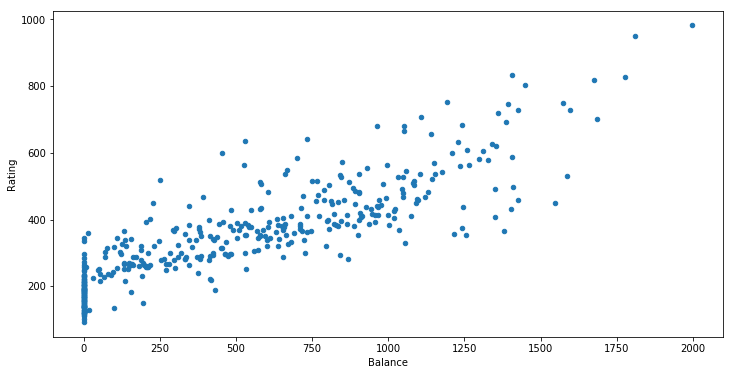

In [124]:
data_credit.plot("Balance", "Income", figsize=(12,6), kind = 'scatter')
data_credit.plot("Balance", "Rating", figsize=(12,6), kind = 'scatter')


400


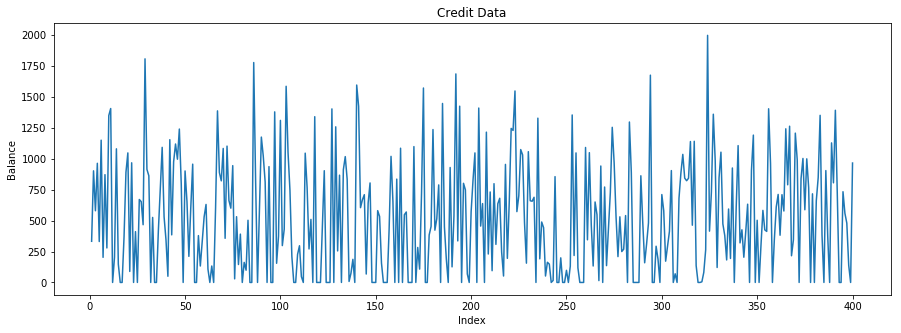

In [125]:
n = len(data_credit.Balance)
print(n)
index = np.arange(n)+1
plt.figure(figsize = (15,5))
plt.plot(index, data_credit.Balance)
plt.xlabel("Index")
plt.ylabel("Balance")
plt.title("Credit Data")
plt.show()

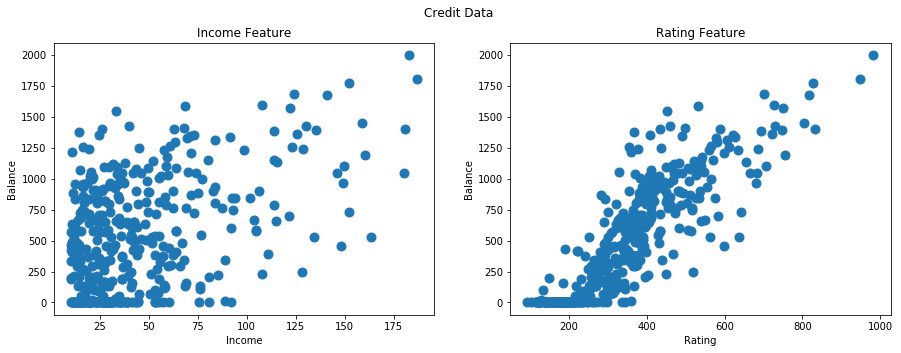

In [126]:
plt.figure(figsize = (15,5))

plt.suptitle('Credit Data')

plt.subplot(121)
plt.plot(data_credit.Income, data_credit.Balance,".", markersize = 18)
plt.xlabel("Income")
plt.ylabel("Balance")
plt.title("Income Feature")

plt.subplot(122)
plt.plot(data_credit.Rating, data_credit.Balance,".", markersize = 18)
plt.xlabel("Rating")
plt.ylabel("Balance")
plt.title("Rating Feature")

plt.show()

             Income     Limit    Rating     Cards       Age  Education  \
Income     1.000000  0.792088  0.791378 -0.018273  0.175338  -0.027692   
Limit      0.792088  1.000000  0.996880  0.010231  0.100888  -0.023549   
Rating     0.791378  0.996880  1.000000  0.053239  0.103165  -0.030136   
Cards     -0.018273  0.010231  0.053239  1.000000  0.042948  -0.051084   
Age        0.175338  0.100888  0.103165  0.042948  1.000000   0.003619   
Education -0.027692 -0.023549 -0.030136 -0.051084  0.003619   1.000000   
Balance    0.463656  0.861697  0.863625  0.086456  0.001835  -0.008062   

            Balance  
Income     0.463656  
Limit      0.861697  
Rating     0.863625  
Cards      0.086456  
Age        0.001835  
Education -0.008062  
Balance    1.000000  


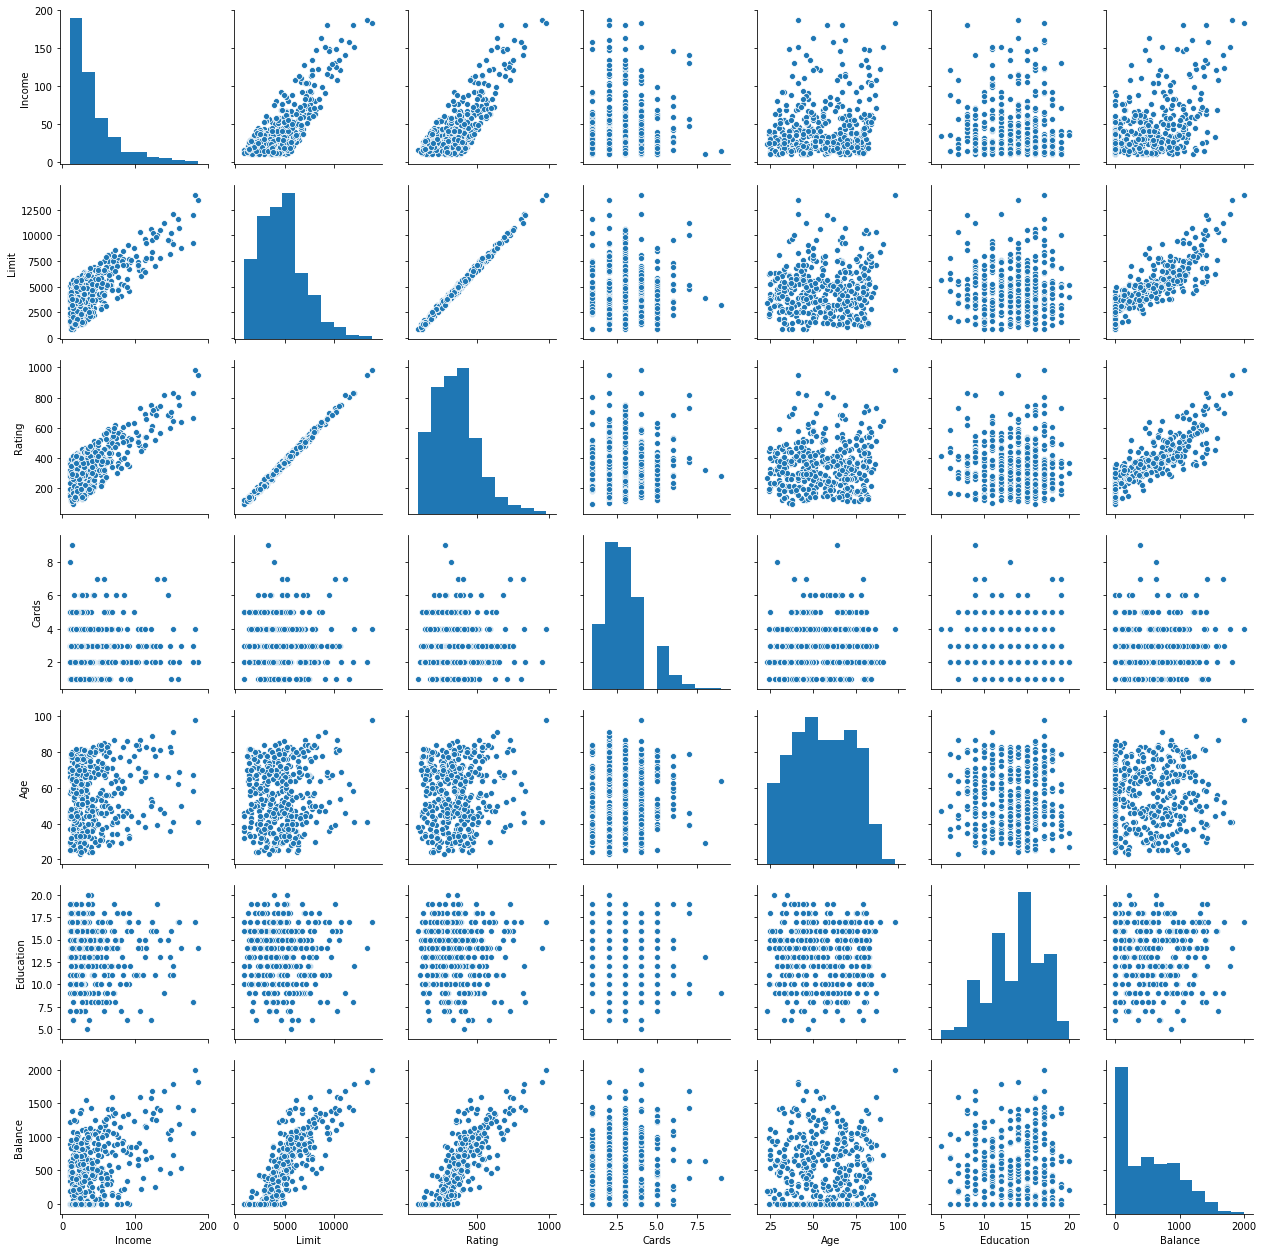

In [127]:
print(data_credit.corr())
sns.pairplot(data_credit)
plt.show()

C:\Users\apoghosyan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


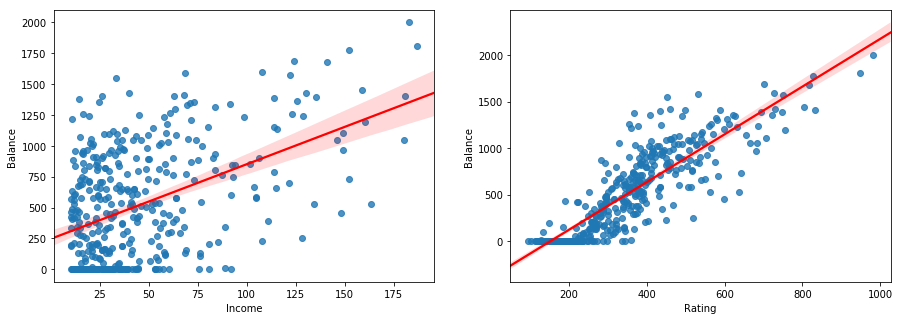

In [128]:
plt.figure(figsize = (15,5))

plt.subplot(121)
sns.regplot(data_credit.Income, data_credit.Balance, order = 1, line_kws = {"color": "red"})

plt.subplot(122)
sns.regplot(data_credit.Rating, data_credit.Balance, order = 1, line_kws = {"color": "red"})
plt.show()

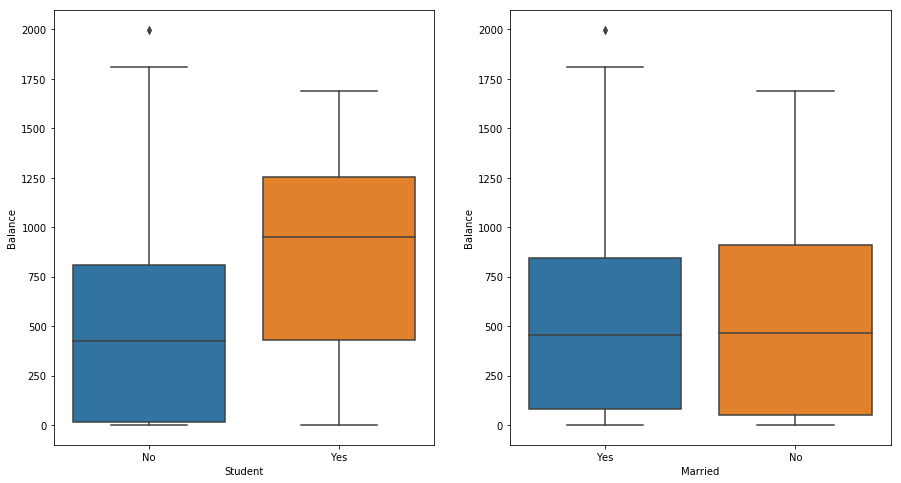

In [129]:
plt.figure(figsize = (15,8))

plt.subplot(121)
sns.boxplot(x = "Student", y = "Balance", data = data_credit)

plt.subplot(122)
sns.boxplot(x = "Married", y = "Balance", data = data_credit)
plt.show()

## Linear Regression by statsmodels.formula.api

In [11]:
model = smf.ols("Balance ~ Income", data_credit)
model_reg = model.fit()
model_results = model_reg.summary()
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           1.03e-22
Time:                        01:41:32   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model_all = smf.ols("Balance ~ Income + Limit + Rating + Cards +Age + Education + Gender + \
Student + Married + Ethnicity", data_credit)
model_all_reg = model_all.fit()
model_all_results = model_all_reg.summary()
model_all_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Wed, 10 Apr 2019   Prob (F-statistic):          1.11e-253
Time:                        01:41:35   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -479.2079     35.774    -13.395      0.000    -549.543    -408.873
Gender[T.Female]         -10.6532      9.914     -1.075      0.283     -30.145       8.839
Student[T.Yes]           425.7474     16.723     25.459      0.000     392.869     458.626
Married[T.Yes]            -8.5339     10.363     -0.824      0.411     -28.908      11.841
Ethnicity[T.Asian]        16.8042     14.119      1.190      0.235     -10.955      44.564
Ethnicity[T.Caucasian]    10.1070     12.210      0.828      0.408     -13.899      34.113
Income                    -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit                      0.1909      0.033      5.824      0.000       0.126       0.255
Rating                     1.1365      0.491      2.315      0.021       0.171       2.102
Cards                     17.7245      4.341      4.083      0.000       9.190      26.259
Age                       -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education                 -1.0989      1.598     -0.688      0.492      -4.241       2.043
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

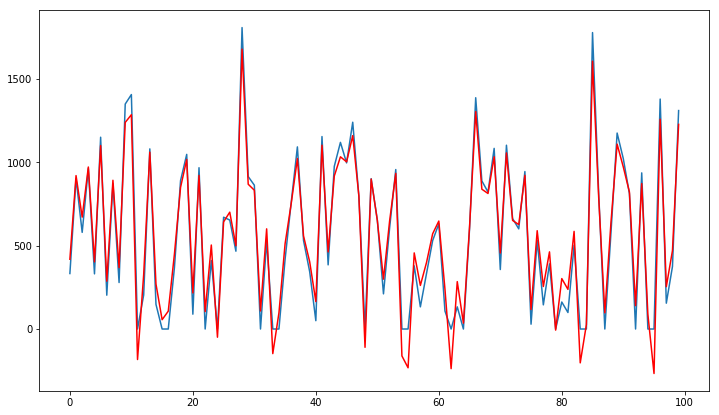

In [13]:
predictions = model_all_reg.predict()
predictions

plt.figure(figsize = (12,7))
plt.plot(data_credit.Balance[:100])
plt.plot(predictions[:100], color = 'red')
plt.show()

In [14]:
model_all = smf.ols("Balance ~ Income + Limit + Rating + Cards +Age + Education + Gender + \
Student + Married + Ethnicity + Limit*Rating", data_credit)
model_all_reg = model_all.fit()
model_all_results = model_all_reg.summary()
model_all_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     935.4
Date:                Wed, 10 Apr 2019   Prob (F-statistic):          3.03e-277
Time:                        01:41:40   Log-Likelihood:                -2339.1
No. Observations:                 400   AIC:                             4704.
Df Residuals:                     387   BIC:                             4756.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -265.5855     35.947     -7.388      0.000    -336.261    -194.910
Gender[T.Female]          -9.0255      8.554     -1.055      0.292     -25.843       7.792
Student[T.Yes]           434.6210     14.447     30.084      0.000     406.217     463.025
Married[T.Yes]            -8.3021      8.940     -0.929      0.354     -25.879       9.275
Ethnicity[T.Asian]        16.9856     12.180      1.394      0.164      -6.963      40.934
Ethnicity[T.Caucasian]    16.1830     10.546      1.534      0.126      -4.553      36.919
Income                    -8.9936      0.227    -39.676      0.000      -9.439      -8.548
Limit                      0.1849      0.028      6.538      0.000       0.129       0.241
Rating                     0.1906      0.431      0.442      0.659      -0.657       1.039
Cards                     18.3145      3.745      4.890      0.000      10.951      25.678
Age                       -0.6609      0.254     -2.606      0.010      -1.160      -0.162
Education                 -1.9960      1.381     -1.446      0.149      -4.711       0.719
Limit:Rating               0.0001      9e-06     11.590      0.000    8.66e-05       0.000
==============================================================================
Omnibus:                        1.292   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.064
Skew:                           0.101   Prob(JB):                        0.587
Kurtosis:                       3.152   Cond. No.                     2.38e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interaction Terms

In [15]:
model_all = smf.ols("Balance ~ Income + Limit + Rating + Cards + Age + Education + Gender + \
Student + Married + Ethnicity + Limit*Rating", data_credit)
model_all_reg = model_all.fit()
model_all_results = model_all_reg.summary()
model_all_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     935.4
Date:                Wed, 10 Apr 2019   Prob (F-statistic):          3.03e-277
Time:                        01:41:44   Log-Likelihood:                -2339.1
No. Observations:                 400   AIC:                             4704.
Df Residuals:                     387   BIC:                             4756.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -265.5855     35.947     -7.388      0.000    -336.261    -194.910
Gender[T.Female]          -9.0255      8.554     -1.055      0.292     -25.843       7.792
Student[T.Yes]           434.6210     14.447     30.084      0.000     406.217     463.025
Married[T.Yes]            -8.3021      8.940     -0.929      0.354     -25.879       9.275
Ethnicity[T.Asian]        16.9856     12.180      1.394      0.164      -6.963      40.934
Ethnicity[T.Caucasian]    16.1830     10.546      1.534      0.126      -4.553      36.919
Income                    -8.9936      0.227    -39.676      0.000      -9.439      -8.548
Limit                      0.1849      0.028      6.538      0.000       0.129       0.241
Rating                     0.1906      0.431      0.442      0.659      -0.657       1.039
Cards                     18.3145      3.745      4.890      0.000      10.951      25.678
Age                       -0.6609      0.254     -2.606      0.010      -1.160      -0.162
Education                 -1.9960      1.381     -1.446      0.149      -4.711       0.719
Limit:Rating               0.0001      9e-06     11.590      0.000    8.66e-05       0.000
==============================================================================
Omnibus:                        1.292   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.064
Skew:                           0.101   Prob(JB):                        0.587
Kurtosis:                       3.152   Cond. No.                     2.38e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
model_all_reg.params

Intercept                -265.585450
Gender[T.Female]           -9.025527
Student[T.Yes]            434.620959
Married[T.Yes]             -8.302051
Ethnicity[T.Asian]         16.985579
Ethnicity[T.Caucasian]     16.183047
Income                     -8.993607
Limit                       0.184913
Rating                      0.190612
Cards                      18.314484
Age                        -0.660913
Education                  -1.995994
Limit:Rating                0.000104
dtype: float64

### Diagnostic Plots 

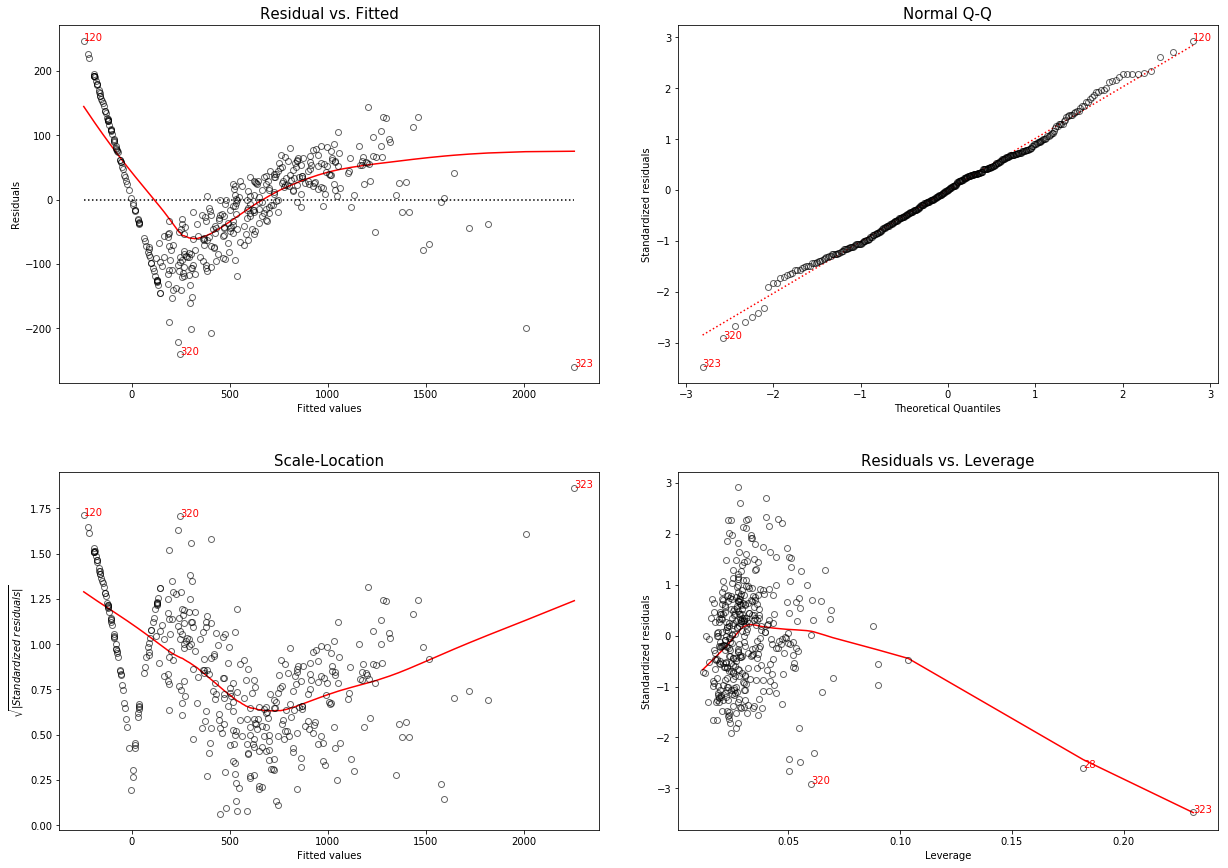

In [20]:
plt.figure(figsize = (17,12))
lmdiag.plot(model_all_reg)
plt.show()

## Construction of X and y

In [21]:
print(data_credit.columns)
print(data_credit.head())
cat_list = ["Gender","Student","Married","Ethnicity"]
df_dummies= pd.get_dummies(data_credit[cat_list], drop_first = True)
df_dummies.head(20)
add = pd.concat([data_credit, df_dummies], axis  = 1)
add.drop(cat_list, inplace = True, axis = 1)
add.head()

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')
    Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   14.891   3606     283      2   34         11    Male      No     Yes   
1  106.025   6645     483      3   82         15  Female     Yes     Yes   
2  104.593   7075     514      4   71         11    Male      No      No   
3  148.924   9504     681      3   36         11  Female      No      No   
4   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  
0  Caucasian      333  
1      Asian      903  
2      Asian      580  
3      Asian      964  
4  Caucasian      331  


,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,333,0,0,1,0,1
1,106.025,6645,483,3,82,15,903,1,1,1,1,0
2,104.593,7075,514,4,71,11,580,0,0,0,1,0
3,148.924,9504,681,3,36,11,964,1,0,0,1,0
4,55.882,4897,357,2,68,16,331,0,0,1,0,1


In [22]:
X = add.drop("Balance", axis = 1)
y = add.Balance 

## VIF

In [23]:
for j in np.arange(X.shape[1]):
    print("j -> ", X.columns[j], "       VIF->", variance_inflation_factor(X.values,j))

j ->  Income        VIF-> 7.23567653743
j ->  Limit        VIF-> 1083.27200529
j ->  Rating        VIF-> 1282.53757794
j ->  Cards        VIF-> 8.18006254976
j ->  Age        VIF-> 9.73328451443
j ->  Education        VIF-> 12.0174089185
j ->  Gender_Female        VIF-> 2.04620772893
j ->  Student_Yes        VIF-> 1.14612942953
j ->  Married_Yes        VIF-> 2.66606343958
j ->  Ethnicity_Asian        VIF-> 1.96986282303
j ->  Ethnicity_Caucasian        VIF-> 2.83969582634


## Linear Regression by statsmodels.api

In [26]:
model_sm = sm.OLS(y,X).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     1194.
Date:                Wed, 10 Apr 2019   Prob (F-statistic):          6.45e-292
Time:                        01:43:35   Log-Likelihood:                -2474.7
No. Observations:                 400   AIC:                             4971.
Df Residuals:                     389   BIC:                             5015.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Income                 -7.3583      0.280    -26.276      0.000      -7.909      -6.808
Limit                   0.3386      0.037      9.084      0.000       0.265       0.412
Rating                 -1.2660      0.552     -2.294      0.022      -2.351      -0.181
Cards                  14.5654      5.235      2.782      0.006       4.273      24.858
Age                    -2.3342      0.319     -7.308      0.000      -2.962      -1.706
Education             -14.5973      1.498     -9.746      0.000     -17.542     -11.652
Gender_Female         -28.6900     11.863     -2.418      0.016     -52.013      -5.367
Student_Yes           425.5730     20.197     21.071      0.000     385.864     465.282
Married_Yes           -23.1227     12.447     -1.858      0.064     -47.594       1.348
Ethnicity_Asian       -27.3532     16.581     -1.650      0.100     -59.953       5.247
Ethnicity_Caucasian   -31.8578     14.253     -2.235      0.026     -59.881      -3.835
==============================================================================
Omnibus:                        7.761   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.312
Skew:                           0.282   Prob(JB):                       0.0258
Kurtosis:                       2.653   Cond. No.                     1.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

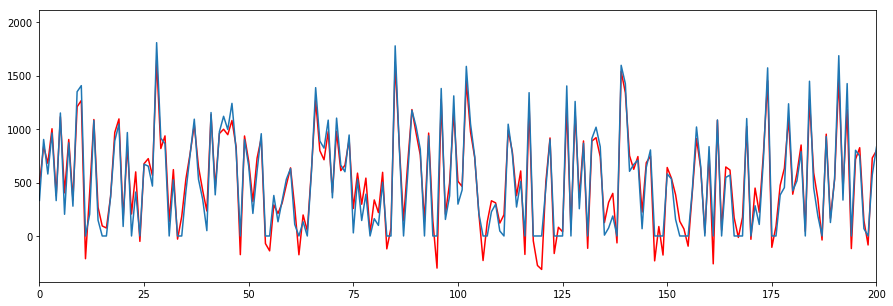

In [27]:
predict = model_sm.predict()
plt.figure(figsize = (15,5))
plt.plot(predict, color = 'red')
plt.plot(data_credit.Balance)
plt.xlim(0,200)
plt.show()

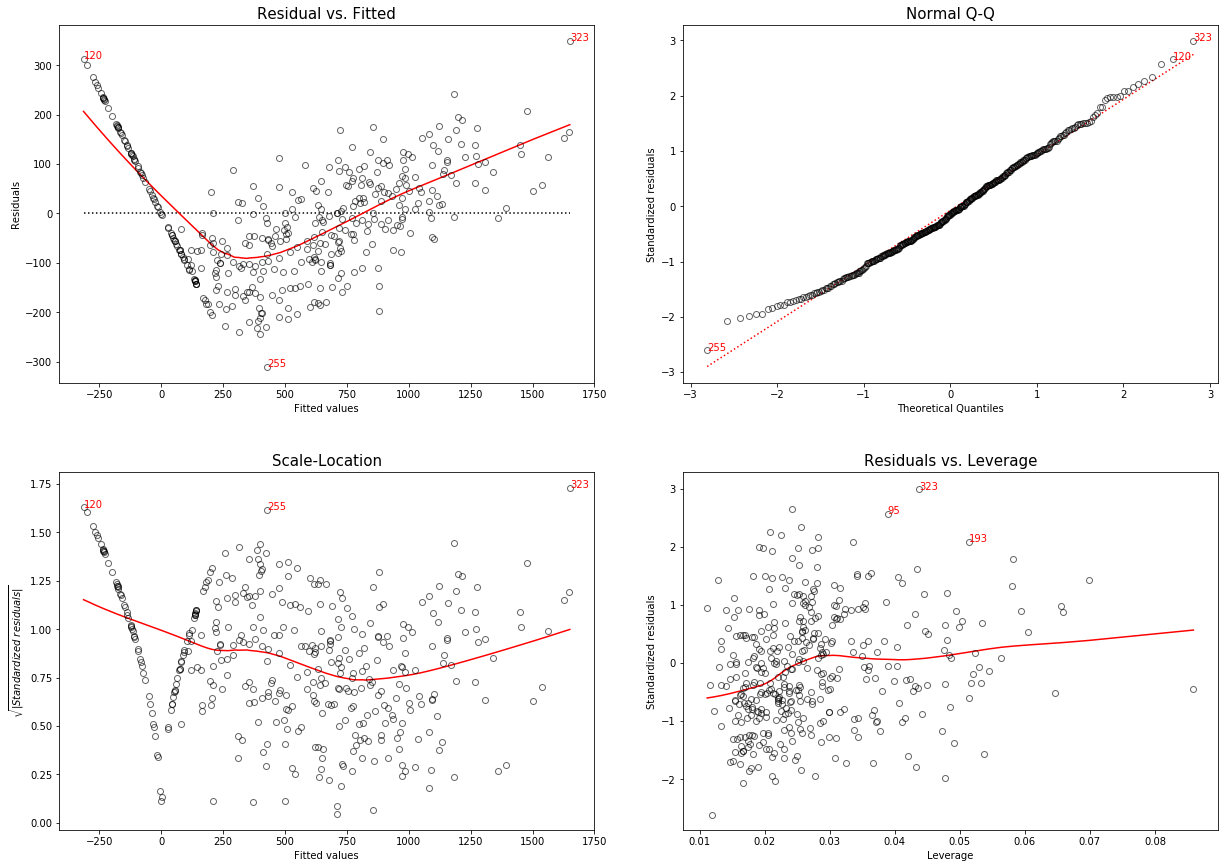

In [30]:
plt.figure(figsize = (17,12))
lmdiag.plot(model_sm)
plt.show()

## Sci-kit Learn 

In [31]:
import sklearn.linear_model as skl_lm

### Simple Linear Regression

In [32]:
regr = skl_lm.LinearRegression()
X = data_credit.Rating.values.reshape(-1,1)
y = data_credit.Balance
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
print(regr.coef_)
print(regr.intercept_)

[ 2.56624033]
-390.846341787


In [34]:
regr.score(X,y)

0.74584841805850366

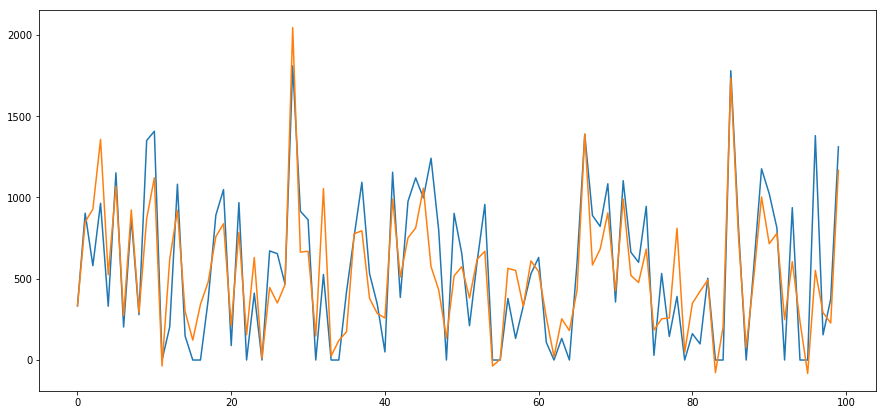

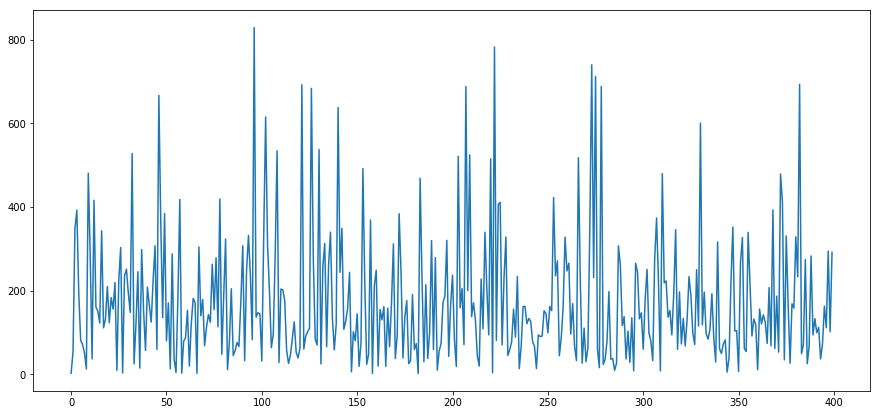

53587.80508183239


In [35]:
pred = regr.predict(X)

plt.figure(figsize = (15,7))
plt.plot(data_credit.Balance[:100])
plt.plot(pred[:100])
plt.show()


plt.figure(figsize = (15,7))
plt.plot(np.abs(data_credit.Balance - pred))
plt.show()

print(np.mean((data_credit.Balance - pred)**2))

### Multiple Linear Regression

In [43]:
cat_list = ["Gender","Student","Married","Ethnicity"]
df_dummies= pd.get_dummies(data_credit[cat_list], drop_first = True)
df_dummies.head(20)
add = pd.concat([data_credit, df_dummies], axis  = 1)
add.drop(cat_list, inplace = True, axis = 1)
X = add.drop("Balance", axis = 1)
y = add.Balance 

In [44]:
regr = skl_lm.LinearRegression()
regr.fit(X,y)
print(regr.coef_)
print(regr.intercept_)
print(regr.score(X,y))

[ -7.80310179e+00   1.90906737e-01   1.13652652e+00   1.77244836e+01
  -6.13908824e-01  -1.09885532e+00  -1.06532477e+01   4.25747360e+02
  -8.53390061e+00   1.68041792e+01   1.01070252e+01]
-479.207870551
0.955101563365


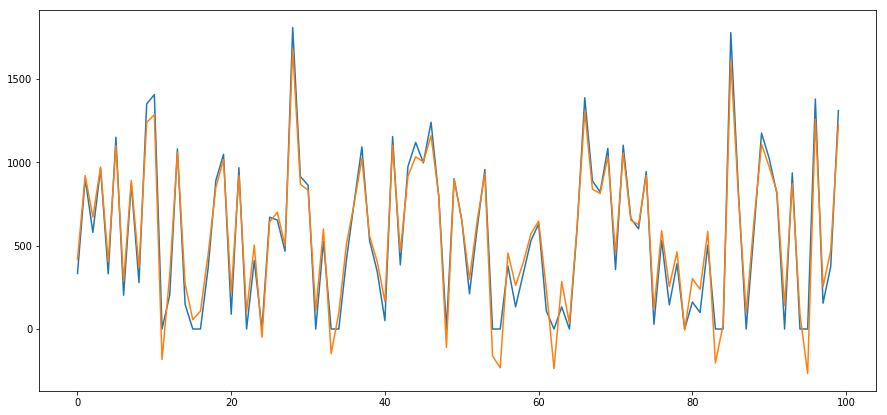

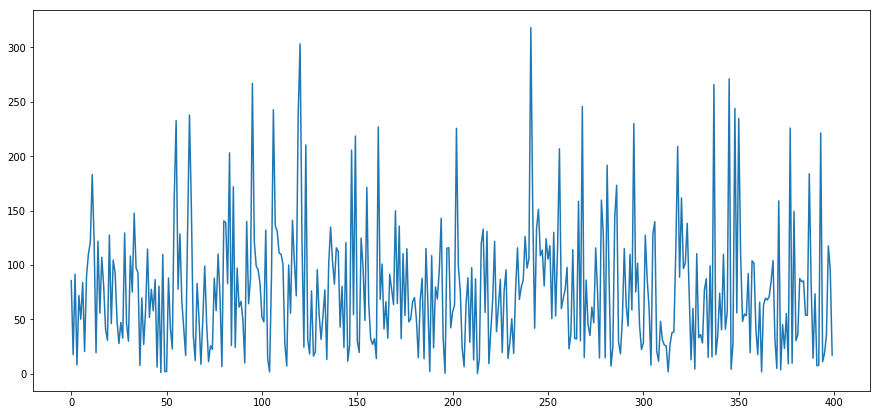

9466.825476694457


In [45]:
pred = regr.predict(X)

plt.figure(figsize = (15,7))
plt.plot(data_credit.Balance[:100])
plt.plot(pred[:100])
plt.show()


plt.figure(figsize = (15,7))
plt.plot(np.abs(data_credit.Balance - pred))
plt.show()

print(np.mean((data_credit.Balance - pred)**2))